In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [114]:
# Check duplicates
df.duplicated().sum()

1024

In [115]:
df.drop_duplicates(keep='first',inplace=True)

In [116]:
df.duplicated().sum()

0

In [117]:
# Check missing values

df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [118]:
# Check data types
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [119]:
# Display the unique values of the object data type columns

for i in df.columns:
    if(df[i].dtypes == 'object'):
        print(f'{i} values are {df[i].unique()}\n')

cap_shape values are ['sunken' 'flat' 'bell' 'convex' 'conical']

cap_surface values are ['scaly' 'fibrous' 'grooves' 'smooth']

cap_color values are ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']

bruises values are ['no' 'yes']

odor values are ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']

gill_attachment values are ['descending' 'notched' 'free' 'attached']

gill_spacing values are ['distant' 'crowded' 'close']

gill_size values are ['broad' 'narrow']

gill_color values are ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']

stalk_shape values are ['tapering' 'enlarging']

stalk_root values are ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']

stalk_surface_above_ring values are ['smooth' 'silky' 'scaly' 'fibrous']

stalk_surface_below_ring values are ['silky' 'scaly' 'smooth' 'fibrous']

stalk_color_above_ring values are ['gray' 'cinnamon' 'yellow' 'white' 'r

In [120]:
# Label encoding for all categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if(df[i].dtypes == 'object'):
        df[i] = le.fit_transform(df[i])

df      

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957


In [121]:
df.dtypes

Unnamed: 0                    int64
cap_shape                     int32
cap_surface                   int32
cap_color                     int32
bruises                       int32
odor                          int32
gill_attachment               int32
gill_spacing                  int32
gill_size                     int32
gill_color                    int32
stalk_shape                   int32
stalk_root                    int32
stalk_surface_above_ring      int32
stalk_surface_below_ring      int32
stalk_color_above_ring        int32
stalk_color_below_ring        int32
veil_type                     int32
veil_color                    int32
ring_number                   int32
ring_type                     int32
spore_print_color             int32
population                    int32
habitat                       int32
class                         int32
stalk_height                float64
cap_diameter                float64
dtype: object

# EDA

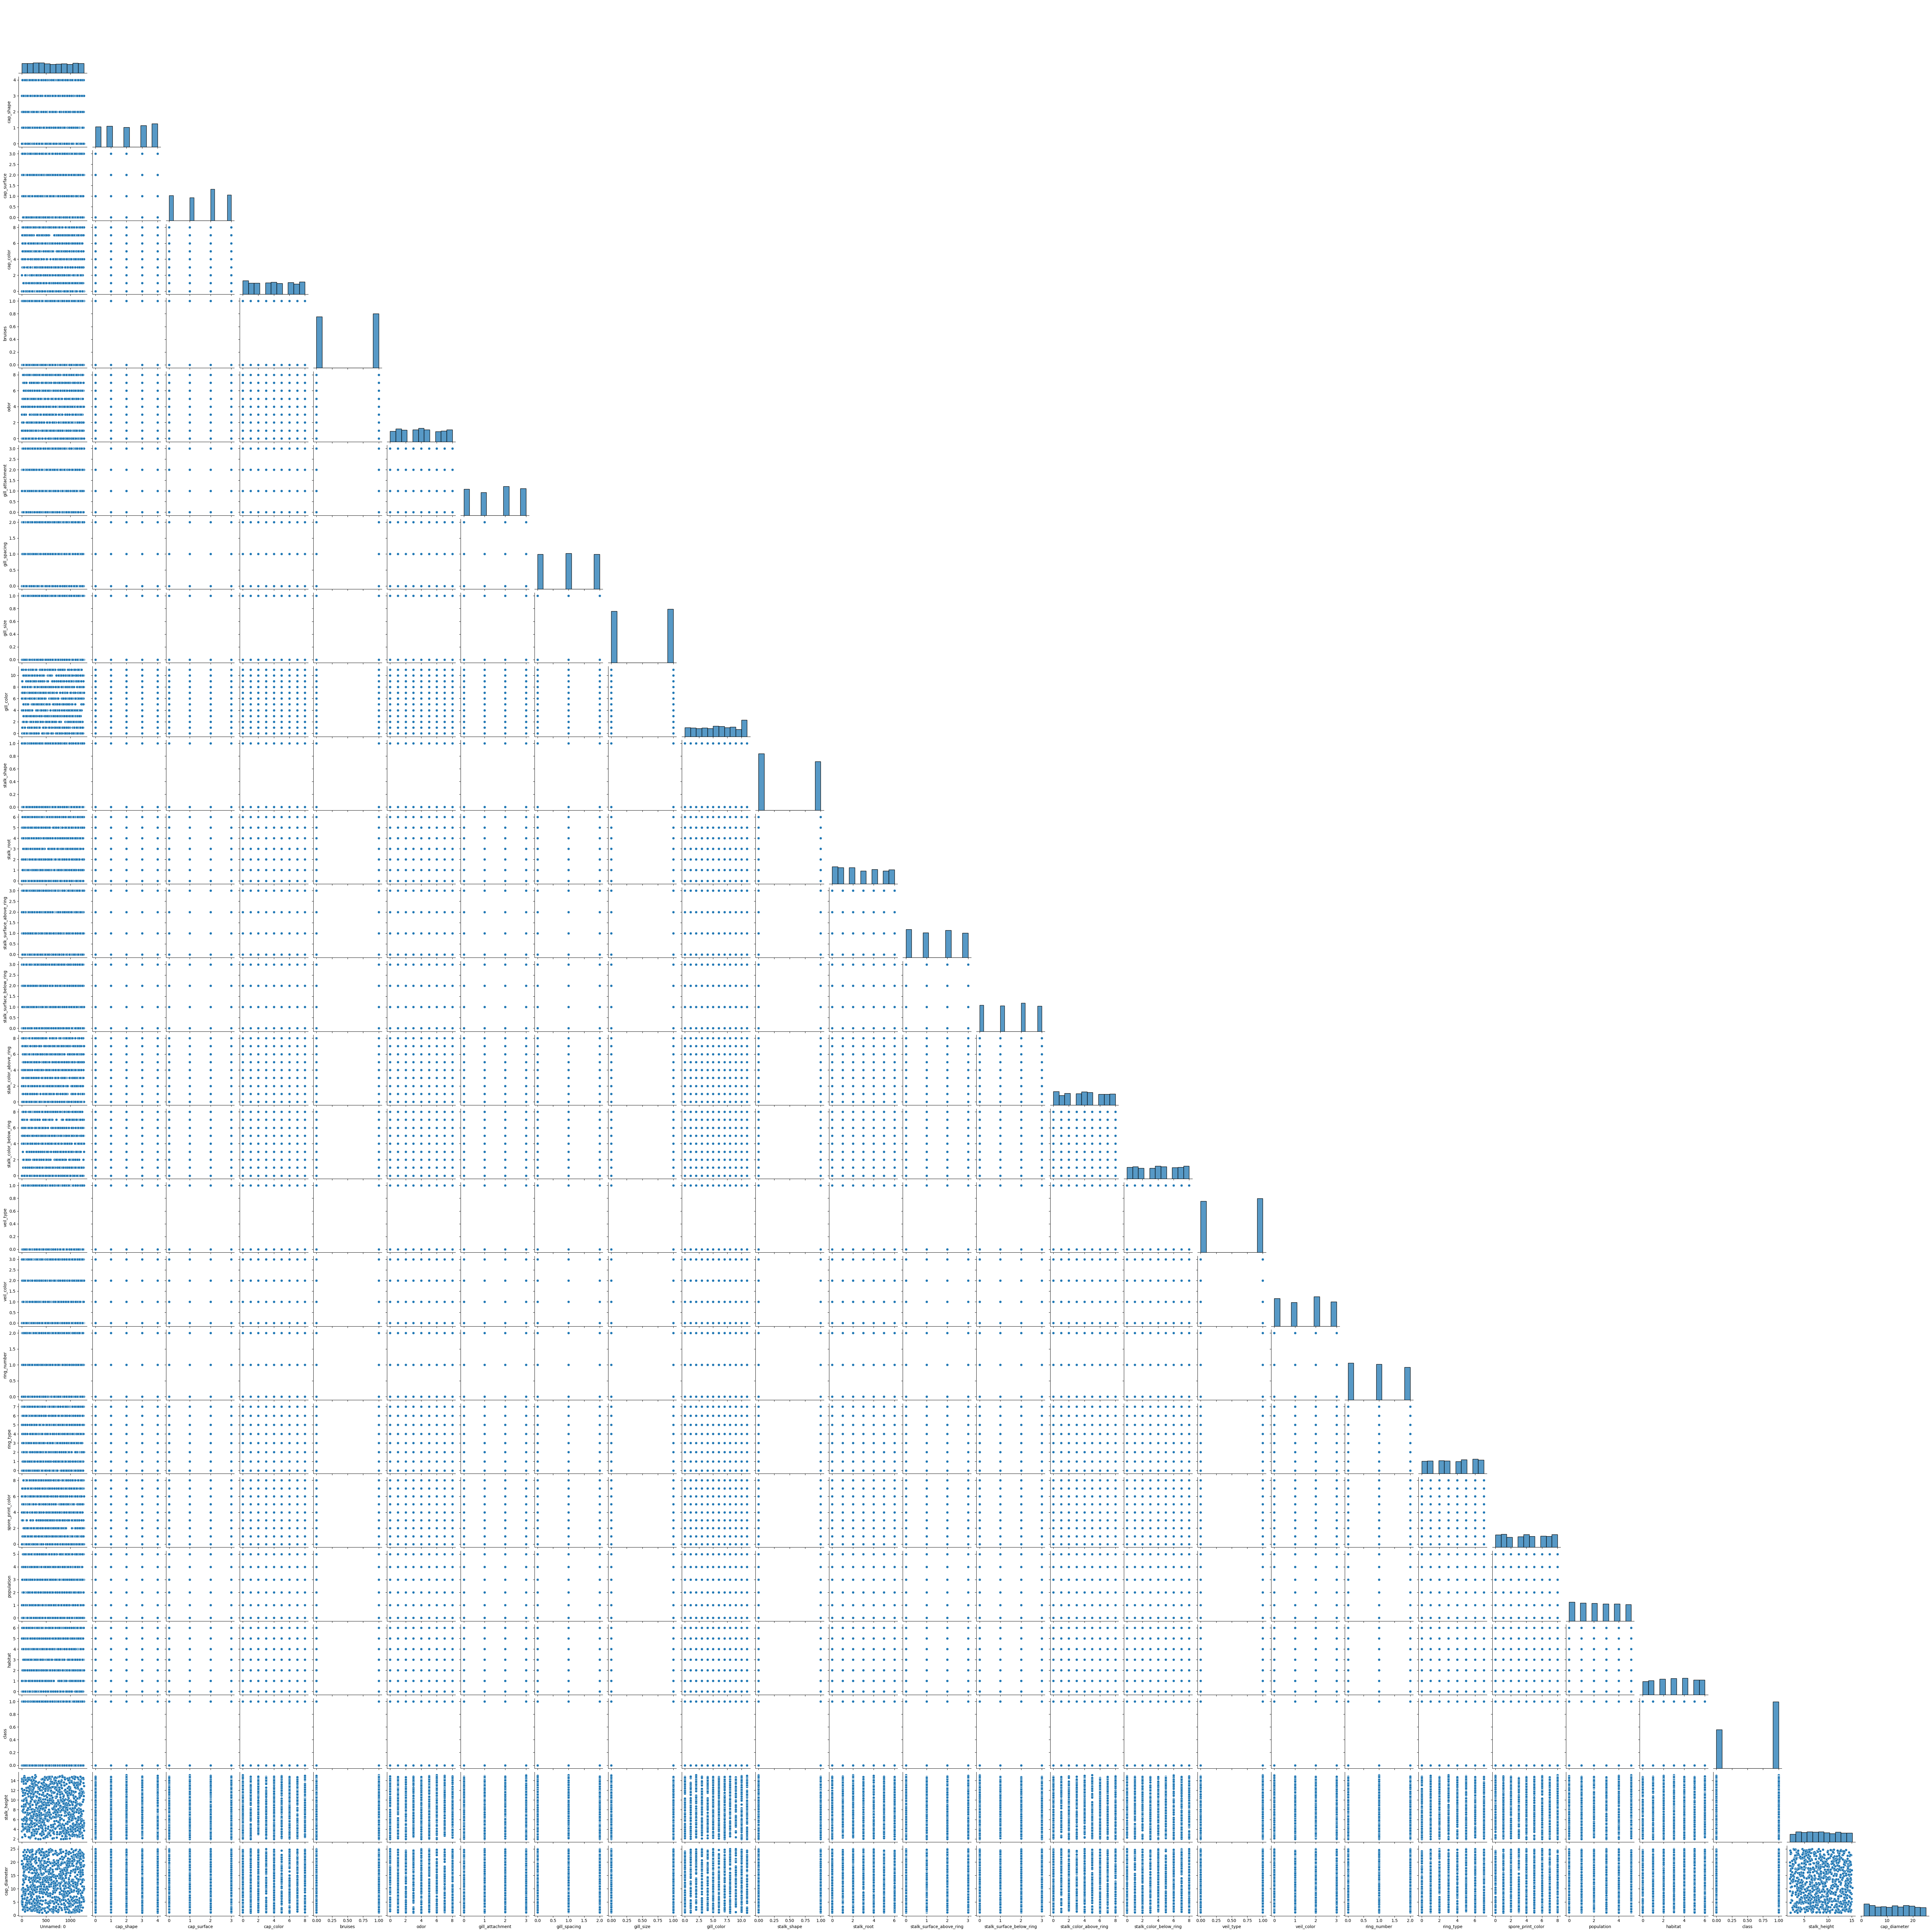

In [122]:
# Histograms and Scatter plots

sns.pairplot(df,corner=True)

<Axes: ylabel='Unnamed: 0'>

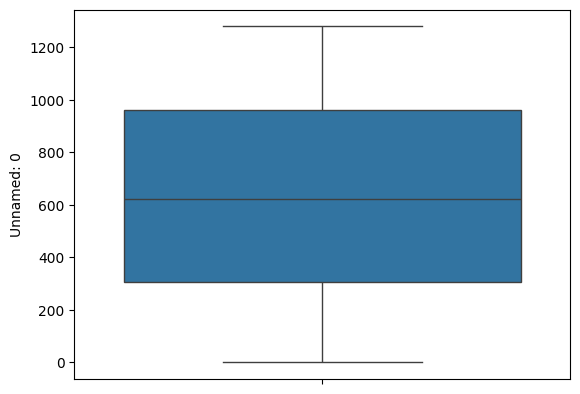

In [123]:
# Boxplots

sns.boxplot(df.iloc[:,0])

<Axes: >

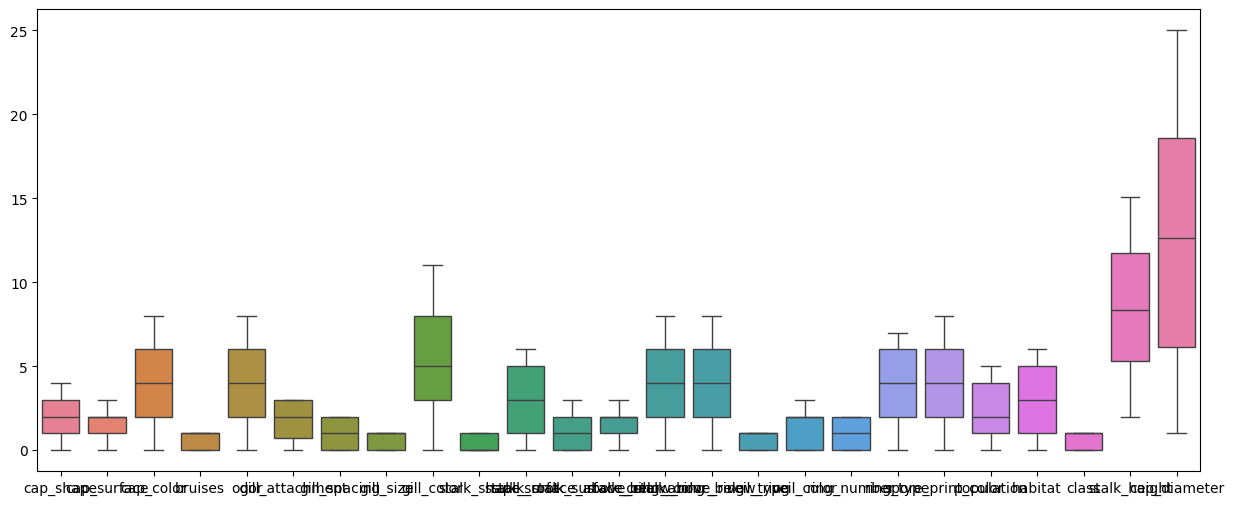

In [124]:
plt.figure(figsize=(15,6))

sns.boxplot(df.iloc[:,1:])

In [125]:
df.describe()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,633.275615,2.065574,1.548156,3.924180,0.514344,3.965164,1.534836,0.997951,0.510246,5.445697,...,0.512295,1.481557,0.960041,3.585041,3.973361,2.427254,3.065574,0.633197,8.524684,12.598566
std,372.262936,1.432159,1.101857,2.625006,0.500050,2.547762,1.121727,0.813978,0.500151,3.385205,...,0.500105,1.114781,0.812367,2.296696,2.627528,1.712948,1.945884,0.482179,3.703043,6.987077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,306.750000,1.000000,1.000000,2.000000,0.000000,2.000000,0.750000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,5.326820,6.141161
50%,622.500000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.000000,1.000000,5.000000,...,1.000000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.367245,12.626094
75%,959.250000,3.000000,2.000000,6.000000,1.000000,6.000000,3.000000,2.000000,1.000000,8.000000,...,1.000000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.758624,18.559780
max,1279.000000,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.000000,1.000000,11.000000,...,1.000000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


# SVM model implementation

In [126]:
from sklearn.svm import SVC

In [127]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [128]:
# Splitting the data
from sklearn.model_selection import train_test_split

x = df.drop(columns='class')
y = df['class']

In [129]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df.drop(columns='class').columns)

In [130]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
ytrain = pd.DataFrame(ytrain,columns=['class'])
ytest = pd.DataFrame(ytest,columns=['class'])

In [131]:
# Model building

svc = SVC()
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.732051282051282
0.5918367346938775


In [132]:
# Evaluation Metrics
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.59      1.00      0.74       116

    accuracy                           0.59       196
   macro avg       0.30      0.50      0.37       196
weighted avg       0.35      0.59      0.44       196



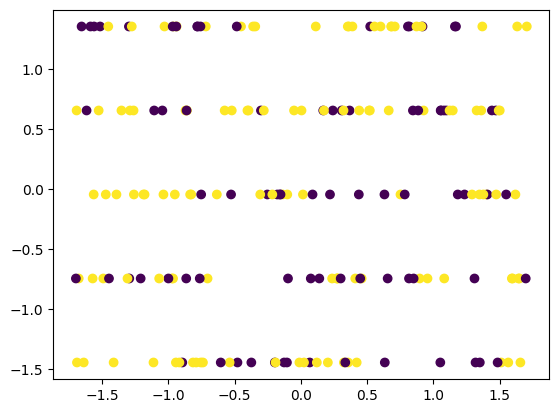

In [133]:
# Visulaize using scatter plot

plt.scatter(xtest.iloc[:, 0], xtest.iloc[:, 1], c=ytest.values, cmap='viridis')

In [158]:
# Hyper parameter tuning

kernel='sigmoid'
alpha=2

svc = SVC(C=alpha,kernel=kernel)

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.6076923076923076
0.5918367346938775


In [149]:
kernel='poly'
alpha=1

svc = SVC(C=alpha,kernel=kernel)

svc.fit(xtrain,ytrain)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.8897435897435897
0.5561224489795918


In [151]:
kernel='linear'
alpha=2

svc = SVC(C=alpha,kernel=kernel)

svc.fit(xtrain,ytrain)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.6435897435897436
0.5918367346938775


In [153]:
kernel='rbf'
alpha=1

svc = SVC(C=alpha,kernel=kernel)

svc.fit(xtrain,ytrain)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.732051282051282
0.5918367346938775


In [157]:
# SVM model scores based on kernels

pd.DataFrame({'RBF':[0.73,0.59],'linear':[0.64,0.59],'poly':[0.89,0.55],'sigmoid':[0.60,0.59]},index=['training score','testing score'])

,RBF,linear,poly,sigmoid
training score,0.73,0.64,0.89,0.60
testing score,0.59,0.59,0.55,0.59


Sigmoid and linear kernels provide better model performance as there is minimal overfitting or underfitting

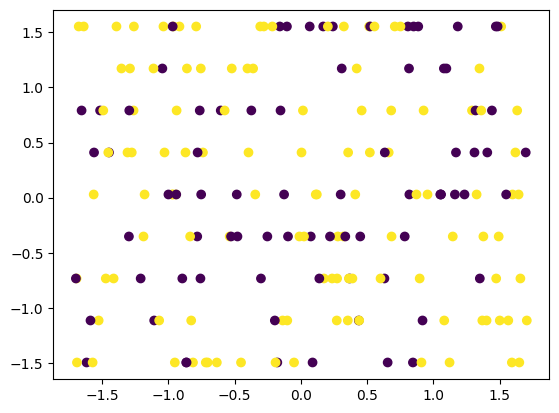

In [167]:
plt.scatter(xtest.iloc[:, 0], xtest.iloc[:, 3], c=ytest.values, cmap='viridis')

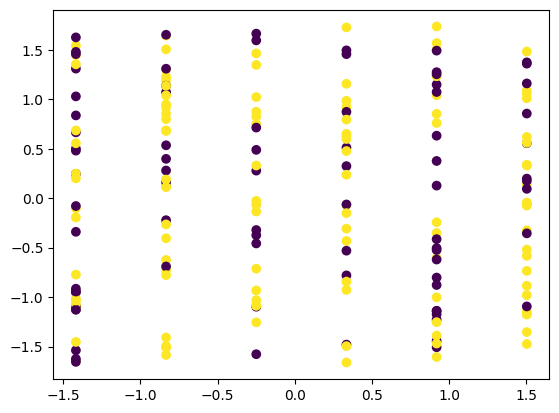

In [182]:
plt.scatter(xtest.iloc[:, 21], xtest.iloc[:, 24], c=ytest.values, cmap='viridis')

# **Strengths and Weaknesses of SVM**

**Strengths**
- Effective in High-Dimensional Spaces
- Robust to Overfitting
- Memory efficient

**Weaknesses**
- Not Suitable for Very Large Datasets
- Harder to interpret
- No prediction probability estimates